# LAT Workshop Tutorial #1: Sensitivity Curves, SNR, Inner Products, Likelihoods

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from lisatools.utils.constants import *
from copy import deepcopy  # can be useful

In the first tutorial, we will learn how to use `lisatools` to generate sensitivity curves for LISA. With this information, we will then compute inner products, signal-to-noise ratios (SNR), and Likelihoods for a basic set of sources. 

在第一个教程中我们将学习如何使用lisatools来生成 LISA的灵敏度曲线.。根据这些信息，我们将计算一组基本源的内积，信噪比(SNR)，以及似然。 

## Task 1: Plotting and comparing sensitivity curves. 绘制并比较灵敏度曲线

Calculate and plot the **sky-averaged** LISA sensitivity function ([LISASens](https://mikekatz04.github.io/LISAanalysistools/build/html/user/sensitivity.html#lisatools.sensitivity.LISASens)) in the characteristic strain representation. Compare the **model** used for the LDC2A (or Sangria) dataset to the Science Requirements Document version for the sensitivity curves (`scirdv1`).

利用特征应变表示计算并绘制 **sky-averaged** LISA 灵敏度函数 . 将LDC2A (或者Sangria)数据集采用的**model**与科学需求文档版本的灵敏性曲线(scirdv1)进行比较.

参考文档:
* [get_available_default_lisa_models](https://mikekatz04.github.io/LISAanalysistools/build/html/user/main.html#lisatools.detector.get_available_default_lisa_models)
* [get_stock_sensitivity_options](https://mikekatz04.github.io/LISAanalysistools/build/html/user/sensitivity.html#lisatools.sensitivity.get_stock_sensitivity_options)
* [get_sensitivity](https://mikekatz04.github.io/LISAanalysistools/build/html/user/sensitivity.html#lisatools.sensitivity.get_sensitivity)
* [LISASens](https://mikekatz04.github.io/LISAanalysistools/build/html/user/sensitivity.html#lisatools.sensitivity.LISASens)

In [3]:
# useful imports
from lisatools.sensitivity import LISASens, get_sensitivity, get_stock_sensitivity_options
import lisatools.detector as lisa_models

In [4]:
get_stock_sensitivity_options()


['X1TDISens',
 'Y1TDISens',
 'Z1TDISens',
 'XY1TDISens',
 'YZ1TDISens',
 'ZX1TDISens',
 'A1TDISens',
 'E1TDISens',
 'T1TDISens',
 'X2TDISens',
 'Y2TDISens',
 'Z2TDISens',
 'LISASens',
 'CornishLISASens',
 'FlatPSDFunction']

In [5]:
lisa_models.get_available_default_lisa_models()

[LISAModel(Soms_d=2.25e-22, Sa_a=9e-30, orbits=<lisatools.detector.DefaultOrbits object at 0x7fca5f132420>, name='scirdv1'),
 LISAModel(Soms_d=9.999999999999999e-23, Sa_a=9e-30, orbits=<lisatools.detector.DefaultOrbits object at 0x7fca5fd63260>, name='proposal'),
 LISAModel(Soms_d=9.999999999999999e-23, Sa_a=5.76e-30, orbits=<lisatools.detector.DefaultOrbits object at 0x7fca5fcfee70>, name='mrdv1'),
 LISAModel(Soms_d=9.999999999999999e-23, Sa_a=5.76e-30, orbits=<lisatools.detector.DefaultOrbits object at 0x7fca5fcbdfa0>, name='sangria')]

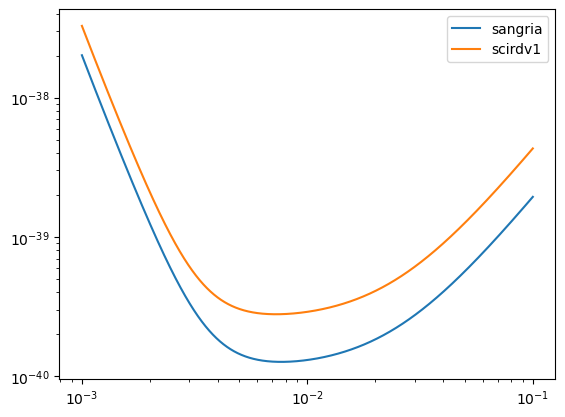

In [6]:
f= np.logspace(-3,-1,10000)

# get_sensitivity() model must be assigned

sen_sangria= get_sensitivity(f,average=True,model=lisa_models.sangria)

plt.loglog(f, sen_sangria, label='sangria')

sen_scirdv1= get_sensitivity(f,average=True, model=lisa_models.scirdv1)

plt.loglog(f, sen_scirdv1, label='scirdv1')
plt.legend()

### Question 1

How do you expect the difference in sensitivity curve models to affect LISA observations? Consider what higher noise at lower or high frequencies will do to our different source classes. 
你认为灵敏度曲线模型的区别会如何影响LISA观测结果？考虑高频和低频下的高噪声会对我们不同的源类造成什么影响。



整体的灵敏度函数来说，scirdv1计算出来的灵敏度会更高一些。

### Question 2

We have asked you to compute the sky-averaged sensitivity curves. What does that mean? Can you determine, without looking at the documentation what the total sky-averaging factor is?

我们之前要求你计算 sky-averaged 灵敏度曲线。它是什么？在不看文档的前提下你可以确定总的sky-averaging 系数是多少吗？

天空平均灵敏度曲线，是将探测器对来自所有可能天空方向和极化状态的引力波的平均灵敏度计算出来的结果。此曲线为了提供一个更实际的性能概览，考虑到实际操作中，引力波的源可能位于天空的任意位置，并具有任意极化态。

采用sangria模型作为例子，我们可以这样得到sky-average系数：

In [7]:
sen_sangria_average= get_sensitivity(f,average=True,model=lisa_models.sangria)

sen_sangria= get_sensitivity(f,average=False,model=lisa_models.sangria)

print(sen_sangria_average / sen_sangria)

[6.66666667 6.66666667 6.66666667 ... 6.66666667 6.66666667 6.66666667]


Now we are going to put our sensitivity information into a [SensitivityMatrix](https://mikekatz04.github.io/LISAanalysistools/build/html/user/sensitivity.html#lisatools.sensitivity.SensitivityMatrix). Build a two-channel (with no cross-channels) sensitivity matrix where both channels' sensitivity are governed by the [LISASens](https://mikekatz04.github.io/LISAanalysistools/build/html/user/sensitivity.html#lisatools.sensitivity.LISASens) sensitivituy function.

现在我们要将敏感度信息放到敏感度矩阵(sensitivitymatrix)中。构造一个双通道(没有交叉通道)的敏感度矩阵使得其中两个通道的灵敏度都由LISASens 灵敏度曲线控制。

Useful documentation 参考文档:
* [SensitivityMatrix](https://mikekatz04.github.io/LISAanalysistools/build/html/user/sensitivity.html#lisatools.sensitivity.SensitivityMatrix)

We will add one extra useful piece of information into here: an estimated Galactic foreground noise to include in the sensitivity. This is important when performing LISA data analysis.

我们将在这里添加一个额外的有用信息：包括敏感度在内的预估的银河系前景噪声。这在执行LISA数据分析时是非常重要的。

The default foreground function is [](). It takes one parameter: observation time in seconds. Use the documentation of the sensitivity function and the stochastic function to determine how to pass this information with the abstracted setup in `lisatools`. 

默认的前景方程是(缺省)。它需要一个参数：以秒为单位的观察时间。利用灵敏度函数和随机函数的文档来确定如何通过lisatools中的抽象设置来传递此信息。

Useful documentation 参考文档:
* [LISASens](https://mikekatz04.github.io/LISAanalysistools/build/html/user/sensitivity.html#lisatools.sensitivity.LISASens)
* [FittedHyperbolicTangentGalacticForeground](https://mikekatz04.github.io/LISAanalysistools/build/html/user/stochastic.html#lisatools.stochastic.FittedHyperbolicTangentGalacticForeground)

In [8]:
# imports
from lisatools.sensitivity import SensitivityMatrix, LISASens

In [9]:
type(SensitivityMatrix)

type

In [10]:
sens_kwargs = dict(
    stochastic_params=(1.0 * YRSID_SI,)
)

sens_mat = SensitivityMatrix(f, [LISASens, LISASens], **sens_kwargs)

Plot it with the [loglog](https://mikekatz04.github.io/LISAanalysistools/build/html/user/sensitivity.html#lisatools.sensitivity.SensitivityMatrix.loglog) method of the matrix.

利用双对数方法画出矩阵。

(<Figure size 640x480 with 2 Axes>, array([<Axes: >, <Axes: >], dtype=object))

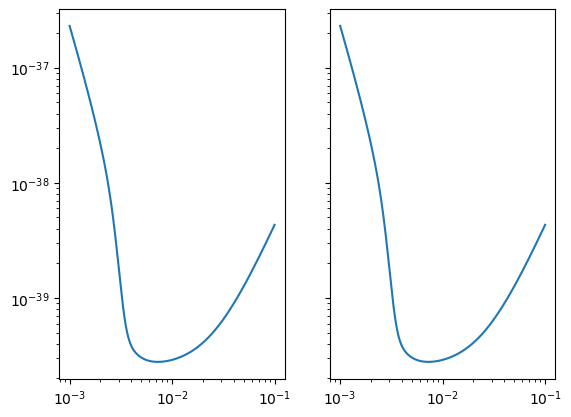

In [11]:
sens_mat.loglog()

Compare the noise curve with and without foreground confusion noise. And then compare the foreground noise at two different values of the observation time. 

比较有前景噪声和没有前景噪声的噪声曲线。然后比较两种不同观测时间值下的前景噪声。

Useful documentation 参考文档:
* [update_stochastic](https://mikekatz04.github.io/LISAanalysistools/build/html/user/sensitivity.html#lisatools.sensitivity.SensitivityMatrix.update_stochastic)

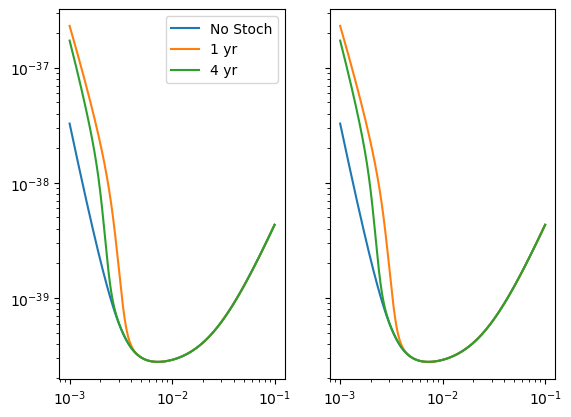

In [12]:
sens_mat_no_confusion = deepcopy(sens_mat)
sens_mat_no_confusion.update_stochastic(stochastic_params=None)

sens_mat_1_yr = deepcopy(sens_mat)
sens_mat_1_yr.update_stochastic(stochastic_params=(1 * YRSID_SI,))

sens_mat_4_yr = deepcopy(sens_mat)
sens_mat_4_yr.update_stochastic(stochastic_params=(4 * YRSID_SI,))

fig, ax = sens_mat_no_confusion.loglog(label="No Stoch")

sens_mat_1_yr.loglog(fig=fig, ax=ax, label="1 yr")
sens_mat_4_yr.loglog(fig=fig, ax=ax, label="4 yr")
ax[0].legend()

### Question

Why does the foreground confusion change over time? What are the broader implications of this on our analysis?

为什么前景混乱会随着时间而演化？这对我们的分析有什么更深远的影响？

### Task 2: Build a DataResArray to house and plot data information. 构建DataResArray来存储和绘制数据信息。

We are going to build a sinusoidal signal for us to do some computations with. We will store it in a [DataResArray](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#lisatools.datacontainer.DataResidualArray). Build a sinusoidal signal with 4 parameters: $A$ (amplitude), $f_0$ (frequency), $\dot{f}_0$ (frequency derivative), and $\phi_0$ (initial phase):

我们将构建一个正弦信号来进行一些计算，信号将被存在 DataResArray 中。正弦信号有四个变量：振幅，频率，频率的导数和初相位：

$$ h_1(t) = A\sin{\left(2\pi (f_0 t + \frac{1}{2}\dot{f}_0t^2) + \phi_0\right)} $$
$$ h_2(t) = A\cos{\left(2\pi (f_0 t + \frac{1}{2}\dot{f}_0t^2) + \phi_0\right)} $$

Pick your parameters. Use a reasonable timestep ( $\sim10$ s  ) and observation time ( $\sim$ yr ) for LISA. Plot $h_1$ and $h_2$. 

选择参数，对LISA使用合适的时间步长和观察时间，画出$h_1$ 和$h_2$ 。

In [22]:
dt = 10.0 #timestep sim 10
Tobs = YRSID_SI
Nobs = int(Tobs / dt)
t = np.arange(Nobs) * dt

(31556130.0, 31558130.0)

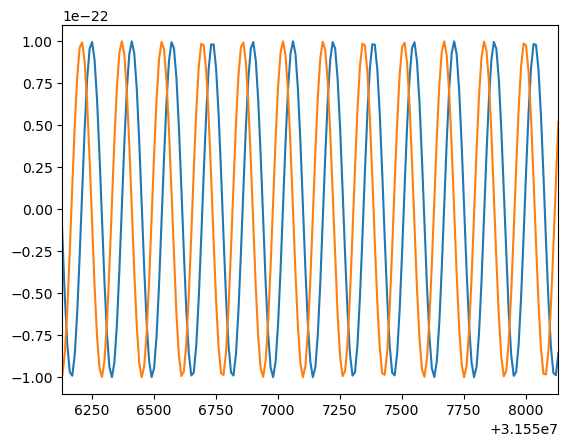

In [23]:
A = 1e-22 #Amplitude
f0 = 3e-3
fdot = 1e-10
phi0 = 4.2

h1 = A * np.sin(2 * np.pi * (f0 * t + 1/2 * fdot * t ** 2) + phi0)
h2 = A * np.cos(2 * np.pi * (f0 * t + 1/2 * fdot * t ** 2) + phi0)
plt.plot(t, h1, label="h1")
plt.plot(t, h2, label="h2")
plt.xlim(t[-1] - 2000.0, t[-1])

Now we will add our two channels (h1, h2) into a `DataResArray`. 

现在我们把两个通道加入到 DataRedArray中。

Useful Documentation 参考文档:
* [DataResidualArray](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#lisatools.datacontainer.DataResidualArray)

In [15]:
# useful imports
from lisatools.datacontainer import DataResidualArray

In [16]:
data_res_arr = DataResidualArray([h1, h2], dt=dt)

/home/joyrich/anaconda3/envs/lisa_env/lib/python3.12/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)


Plot the signals with the data residual array plotting functions.

用数据残差阵列绘图函数对信号进行绘图。

Useful documentation:
* [loglog](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#lisatools.datacontainer.DataResidualArray.loglog)

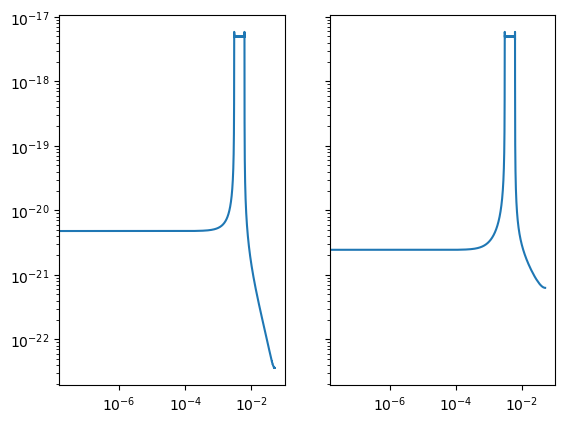

In [17]:
fig, ax = data_res_arr.loglog()

### Question 3

When you put in the time-domain signal from above, the `DataResidualArray` class transforms it under the hood. Looking at the output from above, what transform did it do?

当你在上面放入时域信号时，DataResidualArray类会在底层对其进行转换。根据上面的输出，它实际上做了什么变换?

Let's take the FFT of our input time-domain dataset with numpy (`np.fft.rfft`) and add this to the above plot. 

利用numpy获取输入时域数据集的快速傅里叶变换，并将其添加到上面的图中。

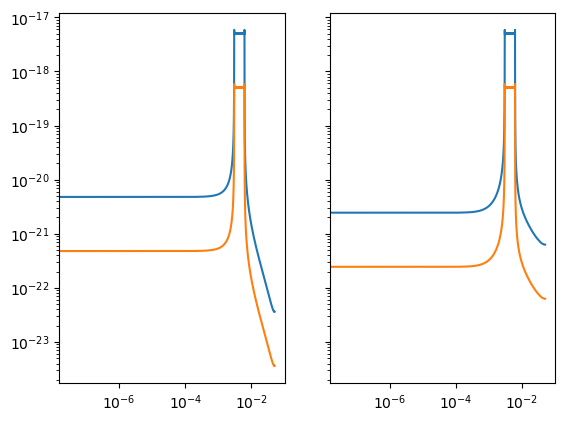

In [18]:
fig, ax = data_res_arr.loglog()
h1_f = np.abs(np.fft.rfft(h1))
h2_f = np.abs(np.fft.rfft(h2))
ax[0].loglog(data_res_arr.f_arr, h1_f)
ax[1].loglog(data_res_arr.f_arr, h2_f)

What is the factor difference between the FFT we did and the frequency-domain spectra stored in our `DataResidualArray`? Where does this term come frome and why is it there? (this is a small detail that is always easy to forget)

我们所作的快速傅里叶变换和存储在我们的DataResidualArray中的频域频谱之间的因子差异是什么？这个术语是怎么来的，为什么会出现(一个很容易遗忘的小细节)？

In [19]:
np.abs(data_res_arr[0]) / h1_f

array([10., 10., 10., ..., 10., 10., 10.])

## Task 3: Combine into an `AnalysisContainer`. 组合到AnalysisContainer

Now we will use our data and sensitivity information and combine it into an [AnalysisContainer](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#analysis-container) object. This object helps streamline the analysis by working under the hood properly with different data and sensitivity matrices.

现在我们将使用我们的数据和敏感性信息并将其组合到一个AnalysisContainer对象中。此对象通过使用合适的数据和敏感度矩阵来帮助简化分析。

Plot the new setup with both the data and sensitivity information. We will do computations with this object a little later. 

利用数据和灵敏度分析绘制新的设置，稍后对此对象进行计算。

Helpful documentation 参考文档:
* [AnalysisContainer](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#analysis-container)
* [AnalysisContainer.loglog](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#lisatools.analysiscontainer.AnalysisContainer.loglog)

In [20]:
from lisatools.analysiscontainer import AnalysisContainer

/home/joyrich/anaconda3/envs/lisa_env/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/joyrich/anaconda3/envs/lisa_env/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(1e-22, 1e-15)

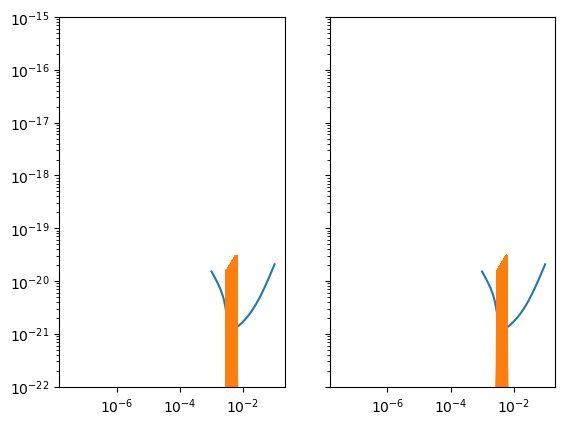

In [21]:
analysis = AnalysisContainer(data_res_arr, sens_mat)
fig, ax = analysis.loglog()
ax[0].set_ylim(1e-22, 1e-15)

## Task 4: Compute the inner product. 计算内积

Now we will inject a signal into the data and calculate the inner product of another signal with that data. We will take `data_res_arr` as the data input. 

现在我们向数据中输入一个信号并计算另一个信号与改数据的内积。我们将使用data_res_arr作为数据输入。

Generate a new signal witih a slightly different set of parameters from the injection you chose above. 

生成一个新的信号使其参数集与上面选择的输入略有不同。

In [25]:
A_new = A
f0_new = f0
fdot_new = fdot * (1.000001) #only fdot changed
phi0_new = phi0


h1_new = A_new * np.sin(2 * np.pi * (f0_new * t + 1/2 * fdot_new * t ** 2) + phi0_new)
h2_new = A_new * np.cos(2 * np.pi * (f0_new * t + 1/2 * fdot_new * t ** 2) + phi0_new)

### Question:

What is the inner product value of your new signal with the injected data? With numpy calculate the inner product using this equation:

新信号与输入数据的内积是什么？利用numpy使用以下公式的计算内积

$$ \langle h_1 | h_2 \rangle = 4 \text{Re} \int_{f_\text{min}}^{f_\text{max}}\frac{\tilde{h}_1(f)^*\tilde{h}_2(f)}{S_n(f)}df \ \ .$$


In [26]:
template = DataResidualArray([h1_new, h2_new], dt=dt)
sens_mat.update_frequency_arr(template.f_arr)
hold_hnew = 4 * template.df * np.real(np.sum(template[:].conj() * data_res_arr[:] / sens_mat[:]))
print(hold_hnew)

/home/joyrich/anaconda3/envs/lisa_env/lib/python3.12/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/home/joyrich/anaconda3/envs/lisa_env/lib/python3.12/site-packages/lisatools/sensitivity.py:83: RuntimeWarning: divide by zero encountered in divide
  Sa_a = Sa_a_in * (1.0 + (0.4e-3 / frq) ** 2) * (1.0 + (frq / 8e-3) ** 4)
/home/joyrich/anaconda3/envs/lisa_env/lib/python3.12/site-packages/lisatools/sensitivity.py:85: RuntimeWarning: divide by zero encountered in power
  Sa_d = Sa_a * (2.0 * np.pi * frq) ** (-4.0)
/home/joyrich/anaconda3/envs/lisa_env/lib/python3.12/site-packages/lisatools/sensitivity.py:87: RuntimeWarning: invalid value encountered in multiply
  Sa_nu = Sa_d * (2.0 * np.pi * frq / C_SI) ** 2
/home/joyrich/anaconda3/envs/lisa_env/lib/python3.12/site-packages/lisatools/sensitivity.py:92: RuntimeWarning: divide by zero encountered in divide
  Soms_d = Soms_d

1700.0118204131759


Now, calculate the inner product using the [inner_product](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#lisatools.analysiscontainer.AnalysisContainer.inner_product) method in the `AnalysisContainer` class. 

利用AnalysisContainer类中的inner_product方法计算内积。

In [27]:
analysis.template_inner_product(template)

1700.0118204131513

The numbers may not match exactly. Under the hood, the inner product function in `lisatools` uses `np.trapz`. If you do a sum, you may get a very small and negligible difference.

这些数字可能并不精确吻合。在底层，lisatools的内积函数使用了np.trapz。如果作和，可能得到一个很小的可以忽略不计的差异。

Play around with the parameters you chose above. Try to understand how the inner product changes with the parameters you choose (i.e. how far they are from the injection parameters). 

使用上面选择过的参数。尝试了解内积如何随着参数的选择而变化(即它们与插入的信号差别有多大)。

## Task 5: Compute the signal-to-noise ratio. 计算信噪比

There are two signal-to-noise ratios (SNR) that are of interest to LISA folks. One is the optimal SNR ($\rho_\text{opt}$) of a template. This is the maximal SNR a template can possible achieve with a given noise profile ($h$ is the template):

LISA的人关注两类信噪比。其中一类是模板的最佳信噪比，这是一个模板在给定噪声的情况下可能达到的最佳信噪比。

$$ \rho_\text{opt} = \sqrt{\langle h | h \rangle}\ \ .  $$

In other words, if the injection data is exactly equivalent to the template, it will achieve this SNR. 

换句话说，如果输入的数据与模板完全等效，那么就可以达到该信噪比。

Another SNR of interest is the detected snr ($\rho_\text{det}$). It is given by,

另外一种信噪比则是实际测量的信噪比，由下式给出

$$ \rho_\text{det} = \frac{\langle d | h \rangle}{\sqrt{\langle h | h \rangle}} = \frac{\langle d | h \rangle}{\rho_\text{opt}}\ \ .  $$



Above, you calcualted $\langle d | h \rangle$, now calculate $\langle h | h \rangle$ with numpy array operations and compute the optimal and detected SNR.

之间计算了$\langle d | h \rangle$，现在利用numpy的array计算 $\langle h | h \rangle$然后得出理论最佳的和实际检测的信噪比。

In [38]:
hnew_hnew = 4 * template.df * np.real(np.sum(template[:].conj() * template[:] / sens_mat[:]))
print(hnew_hnew)
print(f"Optimal SNR: {np.sqrt(hnew_hnew)}, Detected SNR: {hold_hnew / np.sqrt(hnew_hnew)}")

1721.1382148548232
Optimal SNR: 41.486602835792944, Detected SNR: 40.97736869759978


To compute these values with the `AnalysisContainer` object, use the [template_snr](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#lisatools.analysiscontainer.AnalysisContainer.template_snr) method.

在AnalysisContainer对象中利用template_snr方法来计算。

In [29]:
opt_snr, det_snr = analysis.template_snr(template)
print(f"Optimal SNR: {opt_snr}, Detected SNR: {det_snr}")

Opt SNR: 41.486602835792624, Det SNR: 40.9773686975995


### Question

How does changing the parameters of your template affect the optimal SNR and the detected SNR?

## Task 6: Compute the Likelihood. 计算似然

The Likelihood used in LISA (and other areas of GWs) is a Gaussian likelihood that replaces the typical $\frac{x - \mu}{\sigma}$ term with the noise-weighted inner product of the residual data with itself: $\langle \vec{d} - \vec{h} | \vec{d} - \vec{h} \rangle$. Let's break that down. 

LISA以及引力波的其他领域中的似然指的是高斯似然，它利用残差数据和自身的噪声加权内积来取代了经典项。我们来分析一下。


1) What do we mean when we say residual? It is the difference between the data and the template.

什么是残差？是数据和标准之间的差异

$$ \vec{r} = \vec{d} - \vec{h} $$

Calculate the residual of the data and the template and store it in a new `DataResidualArray`.

计算数据和标准的残差，并将其存储在一个新的DataResidualArray中。

In [32]:
r1 = h1_new - h1
r2 = h2_new - h2

residual = DataResidualArray([r1, r2], dt=dt)


2) Calculate the inner product of the residual with itself. Hint: You can put it in a new `AnalysisContainer` and calculate it directly with that. 

计算残差和自己的内积。提示：你可以把它让放在一个新的AnalysisContainer中并直接计算它。

In [35]:
analysis_res = AnalysisContainer(residual, sens_mat)
print(analysis_res.inner_product())

42.252816002732445


3) Build the full Likelihood. The Gaussian likelihood is given by,

建立完整的似然。高斯似然由以下式子给出

$$ \mathcal{L} = e^{-\frac{1}{2}\langle \vec{d} - \vec{h} | \vec{d} - \vec{h} \rangle} \ \ . $$

We usually work with the natural log of the Likelihood:

我们通常处理似然的自然对数

$$ \ln{\mathcal{L}} = -\frac{1}{2}\langle \vec{d} - \vec{h} | \vec{d} - \vec{h} \rangle \ \ . $$

With this in mind. Take your inner product value from above and calculate the Likelihood of this template. 

记住这一点。

In [36]:
likelihood = -1/2 * analysis_res.inner_product()
print(f"Likelihoood: {likelihood}")

Likelihoood: -21.126408001366222


We can also break apart the inner product into usual pieces because the inner product is a linear operation:

我们也可以吧内积拆分成常见的几部分，因为它实际上是一个线性的计算

$$ \ln{\mathcal{L}} = -\frac{1}{2}\left(\langle \vec{d} | \vec{d}\rangle + \langle \vec{h} | \vec{h}\rangle - 2 \langle \vec{d} | \vec{h}\rangle\right) \ \ . $$

You should see some familiar terms emerging:

你也可以预见由以下相似的情形

* $\langle \vec{h} | \vec{h}\rangle = \rho_\text{opt}^2$
* $\langle \vec{d} | \vec{h}\rangle \sim \rho_\text{det} * \rho_\text{opt}$ (when phase maximized)
* $\langle \vec{d} | \vec{d}\rangle$ is the inner product of the data with itself. In MCMC analysis generally, the $\langle \vec{d} | \vec{d}\rangle$ term will remain constant throughout sampling.

You can calculate the Likelihood of a template against the data using the [template_likelihood](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#lisatools.analysiscontainer.AnalysisContainer.template_likelihood) method in the `AnalysisContainer` class. 

你可以用AnalysisContainer类中的template_likelihood方法来计算模板的似然。

In [37]:
analysis.template_likelihood(template)

-21.126408001365917

### Question:


How does changing the parameters effect the Likelihood? How does that relate the optimal and detected SNR values? There are two interesting keyword arguments in the [template_likelihood](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#lisatools.analysiscontainer.AnalysisContainer.template_snr) method: `include_psd_info` and `phase_maximize`. The `phase_maximize` argument can be found for both the Likelihood and SNR computations. Reading the documentation and adding those keyword arguments in, can you figure out what they are doing with these calculations?

改变参数将如何影响似然？这和理论最佳以及实际探测的信噪比之间有什么联系？在template_liklihood方法中有两个有趣的关键字参数：include_psd_info和phase_maximize。在似然和信噪比的计算中都可以找到phase_maximize参数。阅读文档并添加这些关键字参数，你能弄清楚它们在用这些计算处理什么吗？

## Task 7: Add a signal model.  添加一个信号模型

Now we will add a signal model to our Likelihood class. You can either set it as a keyword argument when instantiating the `AnalysisContainer`. Or you can just set it as an attribute after the fact. 

我们将在我们的似然类中添加一个信号模型，你可以将其设置为实例化AnalysisContainer中的一个关键字参数，或者可以在事后将其设置为一个属性。

But first, we need to turn our sinusoidal signal into a function. Build a function that takes our four parameters ($A$, $f_0$, $\dot{f}_0$, and $\phi_0$) and returns a list of `[h1, h2]`. Add the time array as an argument to your generator. So it should have a signature like: `sinusoidal_waveform(A: float, f0: float, fdot0: float, phi0: float, t_arr: np.ndarray)`

但首先我们需要将正弦信号转变为一个函数。构造一个函数使得它需要四个参数作为输入，并且返回一个列表。将时间数组作为一个参数添加到生成器中。所以它的特征应该是sinusodial_waveform(A: float, f0: float, fdot0: float, phi0: float, t_arr: np.ndarray)



In [41]:
def sinusoidal_waveform(A: float, f0: float, fdot: float, phi0: float, t: np.ndarray, **kwargs) -> [np.ndarray, np.ndarray]: # type: ignore
    h1 = A * np.sin(2 * np.pi * (f0 * t + 1/2 * fdot * t ** 2) + phi0)
    h2 = A * np.cos(2 * np.pi * (f0 * t + 1/2 * fdot * t ** 2) + phi0)
    return [h1, h2]

Now add the signal model to our Likelihood class by updating the `signal_gen` attribute. 

现在通过更新sigal_gen属性将信号模型添加到我们的Likelihood类中。

In [42]:
analysis.signal_gen = sinusoidal_waveform

Calculate the Likelihood with a new set of parameters. Remember to add `t` as a last argument to your inputs.

用一组新的参数来计算似然。记得在最后一个参数中添加t。

Helpful documentation 参考文档:
* [AnalysisContainer.calculate_signal_likelihood](https://mikekatz04.github.io/LISAanalysistools/build/html/user/datacontainer.html#lisatools.analysiscontainer.AnalysisContainer.calculate_signal_likelihood)

In [43]:
analysis.calculate_signal_likelihood(A*1.01, f0*1.00, fdot, phi0, t, source_only=True)

-0.08605691209868382

## Extra practice

 Now repeat various parts of the tutorial adjusting the signal or the sensitivity model. Observe how that changes the inner product, SNR, and Likelihood. Having an understanding of these elements is crucial to LISA data analysis!

## 学习总结

通过函数调用实践进一步加深了对类对象、变量和关键字变量的理解。

锻炼了通过参考文档快速学习使用函数的能力(以及包括根据tutorial answer反推某些未注释常数和变量的能力)。

利用不同的内置method计算了内积、信噪比以及似然，计算结果几乎相同，验证了lisatools中内置函数的正确性，计算时间有差异。

复习了数理统计中高斯分布下的似然的计算(通过对数以及线性运算的拆分)。

计算了给定信号的似然。
